<a href="https://colab.research.google.com/github/jackty9/Handling_Imbalanced_Data_in_Python/blob/master/Dealing_with_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and label encoding data

In [ ]:
#optional - to mount Notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#load needed libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#load data
df = pd.read_csv("/content/drive/My Drive/Medium/Data/bank-full.csv", delimiter=';')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#import LabelEncoder library 
from sklearn.preprocessing import LabelEncoder

# Assigning numerical values and storing in another column
df = df.apply(LabelEncoder().fit_transform)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [ ]:
#optional
#export the encoded dataframe as csv
df.to_csv("/content/drive/My Drive/Medium/Data/bank-full-encoded.csv", index = False)

In [ ]:
print(df['y'].value_counts())

0    39922
1     5289
Name: y, dtype: int64


In [ ]:
#Split train-test data
from sklearn.model_selection import train_test_split

# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Alternative: Create artificial classification data

Counter({0: 9900, 1: 100})


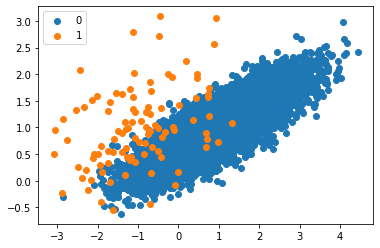

In [ ]:
# Undersample imbalanced dataset with NearMiss-2
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


In [ ]:
counter

Counter({0: 9900, 1: 100})

# Baseline test with Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model=SVC()
clf = model.fit(X_train, y_train)

In [ ]:
#Evaluate results 
from sklearn.metrics import classification_report, roc_auc_score, f1_score

pred = clf.predict(X_test)

print("Classification report for original (baseline) data: ", classification_report(y_test, pred))
print("ROC AUC score for (baseline) data: ", roc_auc_score(y_test, pred))

Classification report for original (baseline) data:                precision    recall  f1-score   support

           0       0.88      1.00      0.94     11927
           1       0.53      0.02      0.04      1637

    accuracy                           0.88     13564
   macro avg       0.70      0.51      0.49     13564
weighted avg       0.84      0.88      0.83     13564

ROC AUC score for (baseline) data:  0.5082947326843059
ROC AUC score for (baseline) data:  0.036556603773584904


# Random Undersampling

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 27995, 1: 3652})
Counter({0: 3652, 1: 3652})


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("Classification report for undersampled data: ", classification_report(y_test, pred_under))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Classification report for undersampled data:                precision    recall  f1-score   support

           0       0.95      0.80      0.87     11927
           1       0.32      0.68      0.44      1637

    accuracy                           0.79     13564
   macro avg       0.63      0.74      0.65     13564
weighted avg       0.87      0.79      0.82     13564

ROC AUC score for undersampled data:  0.7423574863559879
ROC AUC score for (baseline) data:  0.43613707165109034


# Oversampling with SMOTE

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 27995, 1: 3652})
Counter({0: 27995, 1: 27995})


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("Classification report for oversampled SMOTE data: ", classification_report(y_test, pred_SMOTE))
print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))
print("ROC AUC score for (baseline) data: ", f1_score(y_test, pred_SMOTE, average='macro'))

Classification report for oversampled SMOTE data:                precision    recall  f1-score   support

           0       0.95      0.78      0.86     11927
           1       0.31      0.72      0.43      1637

    accuracy                           0.77     13564
   macro avg       0.63      0.75      0.64     13564
weighted avg       0.88      0.77      0.80     13564

ROC AUC score for oversampled SMOTE data:  0.7496942431147657
ROC AUC score for (baseline) data:  0.6437550248237827


# Combining random undersampling and SMOTE oversampling

In [ ]:
# import needed libraries 
from numpy import mean
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
model = SVC()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

Mean ROC AUC: 0.820


# Chosing the best sampling rate

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# values to evaluate
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))

SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.821
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.820
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.819
